In [10]:
subscription_key = 'b1968b1272c84706b04c553588faaf68'

In [2]:
import urllib.parse, http.client, json

headers = {
    'Ocp-Apim-Subscription-Key':subscription_key
}

body = {
    'url':'https://i.ytimg.com/vi/lNdN7J8948Y/maxresdefault.jpg'
}

params = urllib.parse.urlencode({
    'visualFeatures':'faces',
    'details':'celebrities',
    'language':'en'
})

try:
    conn = http.client.HTTPSConnection("southcentralus.api.cognitive.microsoft.com")
    conn.request("POST", "/vision/v2.0/analyze?%s" % params, str(body), headers)
    response = conn.getresponse()
    jsonData = response.read()
    data = json.loads(jsonData)
    print(json.dumps(data, sort_keys=True, indent=2))
    conn.close()
except Expception as ex:
    print(ex)

{
  "categories": [
    {
      "name": "outdoor_sportsfield",
      "score": 0.73828125
    }
  ],
  "faces": [],
  "metadata": {
    "format": "Jpeg",
    "height": 720,
    "width": 1280
  },
  "requestId": "dd2aa141-8080-4b78-b697-906f23812631"
}


In [10]:
params_describe = urllib.parse.urlencode({
    'maxCandidates':'2',
    'language':'en'
})

try:
    conn = http.client.HTTPSConnection("southcentralus.api.cognitive.microsoft.com")
    conn.request("POST", "/vision/v2.0/describe?%s" % params_describe, str(body), headers)
    response = conn.getresponse()
    jsonData = response.read()
    data = json.loads(jsonData)
    print(json.dumps(data, sort_keys=True, indent=2))
    conn.close()
except Exception as ex:
    print(ex)

{
  "description": {
    "captions": [
      {
        "confidence": 0.9624482508715679,
        "text": "a crowd of people watching a baseball game"
      },
      {
        "confidence": 0.9557926502207649,
        "text": "a large crowd of people watching a baseball game"
      }
    ],
    "tags": [
      "grass",
      "sport",
      "baseball",
      "game",
      "outdoor",
      "person",
      "player",
      "large",
      "ball",
      "field",
      "front",
      "standing",
      "crowd",
      "throwing",
      "man",
      "pitcher",
      "watching",
      "people",
      "sitting",
      "group",
      "talking",
      "ready",
      "many",
      "batter",
      "playing",
      "pitch",
      "crowded",
      "plate"
    ]
  },
  "metadata": {
    "format": "Jpeg",
    "height": 720,
    "width": 1280
  },
  "requestId": "f8c25848-1d9c-4c24-b0fc-2312634cad99"
}


In [3]:
ocr_url = "https://s3-us-west-2.amazonaws.com/tabs.web.media/b/r/brry/brry-square-orig.jpg"
ocr_params = urllib.parse.urlencode({
    'language':'en',
    'detectOrientation':False
})

body = {
    'url':ocr_url
}

try:
    conn = http.client.HTTPSConnection("southcentralus.api.cognitive.microsoft.com")
    conn.request('POST', '/vision/v2.0/ocr?%s' % ocr_params, str(body), headers)
    response = conn.getresponse()
    jsonData = response.read()
    data = json.loads(jsonData)
    print(json.dumps(data, sort_keys=True, indent=2))
    conn.close()
except Exception as ex:
    print(ex)

{
  "language": "en",
  "orientation": "NotDetected",
  "regions": [
    {
      "boundingBox": "378,680,784,826",
      "lines": [
        {
          "boundingBox": "504,680,544,232",
          "words": [
            {
              "boundingBox": "504,680,544,232",
              "text": "HABIT"
            }
          ]
        },
        {
          "boundingBox": "534,1002,528,46",
          "words": [
            {
              "boundingBox": "534,1002,35,38",
              "text": "s"
            },
            {
              "boundingBox": "580,1002,131,38",
              "text": "-rop"
            },
            {
              "boundingBox": "744,1002,318,46",
              "text": "WISHING,"
            }
          ]
        },
        {
          "boundingBox": "552,1078,492,46",
          "words": [
            {
              "boundingBox": "552,1078,214,38",
              "text": "START"
            },
            {
              "boundingBox": "805,1078,239,46",
     

HABIT
s
-rop
WISHING,
START
DOING,
and
TAKE
COMMAND
OF
YOUR
LIFE
BERNARD
ROTH
READ
BY
SEAN
PRATT


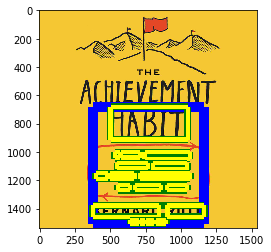

In [5]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

image_response = requests.get(ocr_url)
image = Image.open(BytesIO(image_response.content))

drawing = ImageDraw.Draw(image)

region_color = 'blue'
line_color = 'green'
word_color = 'yellow'

for region in data['regions']:
    region_box = region['boundingBox']
    values = region_box.split(',')
    left = int(values[0])
    top = int(values[1])
    width = int(values[2])
    height = int(values[3])
    drawing.line([(left,top),(left+width,top)], fill=region_color, width=70)
    drawing.line([(left+width,top),(left+width,top+height)], fill=region_color, width=70)
    drawing.line([(left+width,top+height),(left,top+height)], fill=region_color, width=70)
    drawing.line([(left,top+height),(left,top)], fill=region_color, width=70)
    for line in region['lines']:
        line_box = line['boundingBox']
        line_values = line_box.split(',')
        line_left = int(line_values[0])
        line_top = int(line_values[1])
        line_width = int(line_values[2])
        line_height = int(line_values[3])
        drawing.line([(line_left,line_top),(line_left+line_width,line_top)], fill=line_color, width=50)
        drawing.line([(line_left+line_width,line_top),(line_left+line_width,line_top+line_height)], fill=line_color, width=50)
        drawing.line([(line_left+line_width,line_top+line_height),(line_left,line_top+line_height)], fill=line_color, width=50)
        drawing.line([(line_left,line_top+line_height),(line_left,line_top)], fill=line_color, width=50)
        for word in line['words']:
            print(word['text'])
            word_box = word['boundingBox']
            word_values = word_box.split(',')
            word_left = int(word_values[0])
            word_top = int(word_values[1])
            word_width = int(word_values[2])
            word_height = int(word_values[3])
            drawing.line([(word_left,word_top),(word_left+word_width,word_top)], fill=word_color, width=30)
            drawing.line([(word_left+word_width,word_top),(word_left+word_width,word_top+word_height)], fill=word_color, width=30)
            drawing.line([(word_left+word_width,word_top+word_height),(word_left,word_top+word_height)], fill=word_color, width=30)
            drawing.line([(word_left,word_top+word_height),(word_left,word_top)], fill=word_color, width=30)

plt.imshow(image)
plt.show()

In [12]:
headers = {
    'Content-Type':'application/octet-stream',
    'Ocp-Apim-Subscription-Key':subscription_key,
    'Accept':'application/json'
}

params = urllib.parse.urlencode({
    'mode':'Handwritten'
})

with open("HandwrittingTest3.png", "rb") as body:
    conn = http.client.HTTPSConnection("southcentralus.api.cognitive.microsoft.com")
    conn.request("POST", "/vision/v2.0/recognizeText?%s" % params, body, headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    operation_location = response.getheader('Operation-Location')
    print(operation_location)
    conn.close()

b''
https://southcentralus.api.cognitive.microsoft.com/vision/v2.0/textOperations/103d4737-fd41-46bb-98a1-ad540a316a00


In [13]:
import requests

response = requests.get(operation_location, headers=headers)
jsonData = response.content
data = json.loads(jsonData)
print(json.dumps(data, sort_keys=True, indent=2))

{
  "recognitionResult": {
    "lines": [
      {
        "boundingBox": [
          142,
          373,
          1768,
          339,
          1772,
          519,
          146,
          551
        ],
        "text": "Finally some handwritten text that",
        "words": [
          {
            "boundingBox": [
              105,
              373,
              450,
              362,
              462,
              545,
              117,
              556
            ],
            "text": "Finally"
          },
          {
            "boundingBox": [
              527,
              359,
              777,
              351,
              790,
              535,
              540,
              543
            ],
            "text": "some"
          },
          {
            "boundingBox": [
              812,
              350,
              1312,
              335,
              1324,
              518,
              824,
              534
            ],
            "t